This code depends on output of https://pypi.org/project/multiprocess-profiler/#description package

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

### Load data

In [2]:
csv_path = Path("/home/ramon/Git/adroit/vision_ground/profile.csv")

df = pd.read_csv(csv_path)
df.set_index("id", inplace=True)

In [3]:
df.head(10)

,time,pid,ppid,process_name,parent_process_name,broken,error_type,error_value,traceback
id,,,,,,,,,
select_model,0.633307,24519,24513,python,python,False,NaN,NaN,NoneType: None\n
load_network,2.798894,24519,24513,python,python,False,NaN,NaN,NoneType: None\n
__init__,2.868013,24519,24513,python,python,False,NaN,NaN,NoneType: None\n
get_png_index,0.000043,24519,24513,python,python,False,NaN,NaN,NoneType: None\n
get_png_index,0.000008,24519,24513,python,python,False,NaN,NaN,NoneType: None\n
make_batch_data,0.012687,24519,24513,python,python,False,NaN,NaN,NoneType: None\n
inference,1.078964,24519,24513,python,python,False,NaN,NaN,NoneType: None\n
make_batch_data,0.010700,24519,24513,python,python,False,NaN,NaN,NoneType: None\n
inference,0.889811,24519,24513,python,python,False,NaN,NaN,NoneType: None\n


### Check if script run bash (father) and python (child), this means the script runs one time and csv file do not append another tests

In [4]:
df["ppid"].unique()

array([24513])

### Check if any function broke in runtime

In [5]:
df[df['broken'] == True]

,time,pid,ppid,process_name,parent_process_name,broken,error_type,error_value,traceback
id,,,,,,,,,


### Calculate profiler metrics

In [6]:
df_grp_by_id = df.groupby(["id"])
# create df by mean time
df_per_call = pd.DataFrame(df_grp_by_id["time"].mean())
# add number of calls
df_per_call["#calls"] = df_grp_by_id.count()["time"]
# add total time spent per function
df_per_call["total_time"] = df_grp_by_id.sum()["time"]
# add number of process
df_per_call["#process"] = df_grp_by_id["pid"].nunique()
# add time per process
df_per_call["time_per_process"] = df_per_call["total_time"] / df_per_call["#process"]
df_per_call.sort_index()

,time,#calls,total_time,#process,time_per_process
id,,,,,
<module>,184.978139,1,184.978139,1,184.978139
__init__,2.868013,1,2.868013,1,2.868013
empty_cache,0.026396,1,0.026396,1,0.026396
get_png_index,0.000017,8,0.000136,1,0.000136
inference,0.878123,128,112.399770,1,112.399770
load_network,2.798894,1,2.798894,1,2.798894
make_batch_data,0.023483,128,3.005786,1,3.005786
select_model,0.633307,1,0.633307,1,0.633307


### boxplot and outliers

In [7]:
rows = ["__init__", "inference", "load_network", "make_batch_data", "get_png_index"]
df_fil = df.loc[df.index.isin(rows)]

In [8]:
df_fil

,time,pid,ppid,process_name,parent_process_name,broken,error_type,error_value,traceback
id,,,,,,,,,
load_network,2.798894,24519,24513,python,python,False,NaN,NaN,NoneType: None\n
__init__,2.868013,24519,24513,python,python,False,NaN,NaN,NoneType: None\n
get_png_index,0.000043,24519,24513,python,python,False,NaN,NaN,NoneType: None\n
get_png_index,0.000008,24519,24513,python,python,False,NaN,NaN,NoneType: None\n
make_batch_data,0.012687,24519,24513,python,python,False,NaN,NaN,NoneType: None\n
...,...,...,...,...,...,...,...,...,...
inference,0.815271,24519,24513,python,python,False,NaN,NaN,NoneType: None\n
make_batch_data,0.008036,24519,24513,python,python,False,NaN,NaN,NoneType: None\n
inference,0.817528,24519,24513,python,python,False,NaN,NaN,NoneType: None\n


Text(0, 0.5, 'Functions/Methods')

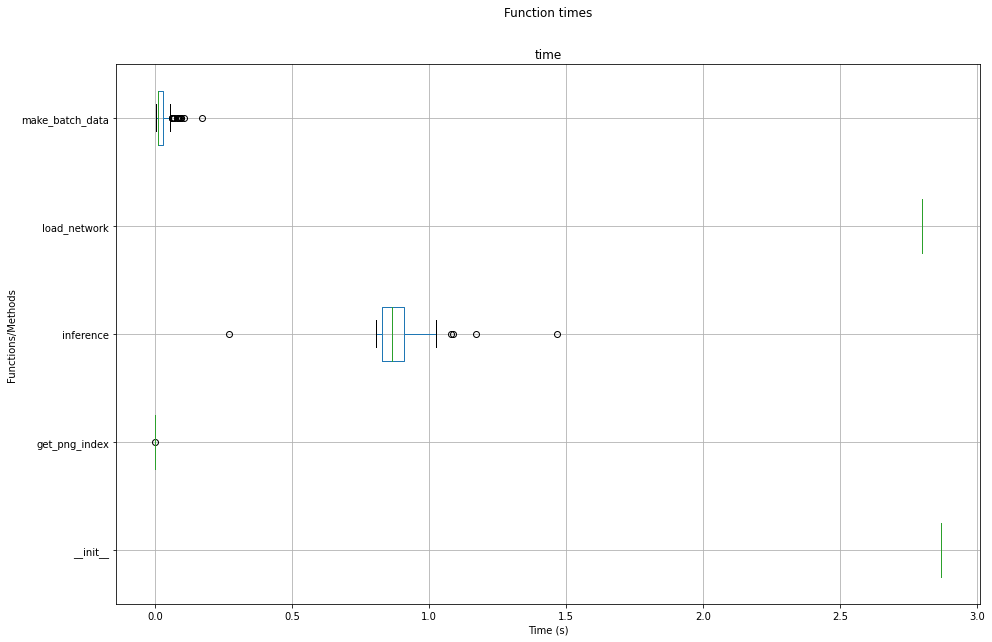

In [9]:
# ax plot properties
ax = df_fil.boxplot(column=["time"],
                    by="id",
                    rot=0,
                    figsize=(15,10),
                    vert=False,)
fig = ax.get_figure()
fig.suptitle("Function times")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Functions/Methods")

In [10]:
print(f'{round(3/112 * 100,2)}%')

2.68%


In [ ]:
mini_batch_img = np.empty((len(images), 3, size[1], size[0]), dtype = np.float32)
for i , img in enumerate(images):
    sz_img = cv2.resize(img, size)
    sz_img = sz_img[:, :, ::-1]  # RGB -> BGR

    # transpose (H, W, 3) -> (3, H, W)
    mini_batch_img[i, 0, ...] = sz_img[..., 0]
    mini_batch_img[i, 1, ...] = sz_img[..., 1]
    mini_batch_img[i, 2, ...] = sz_img[..., 2]

mini_batch_img = mini_batch_img / 255.
mini_batch_img = torch.from_numpy(mini_batch_img).float()


In [ ]:
mini_batch_img = []
aug = albu.Compose([albu.ToFloat(max_value=255, always_apply=True), ToTensorV2()])
for i , img in enumerate(images):
    sz_img = cv2.resize(img, size)
    sz_img = cv2.cvtColor(sz_img, cv2.COLOR_RGB2BGR)
    sz_img_aug = aug(image=sz_img)['image']
    mini_batch_img.append(sz_img_aug)

mini_batch_img_t = torch.stack(mini_batch_img)